# Satellite

In [2]:
from __future__ import print_function
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature,NaturalEarthFeature
from shapely.geometry import Polygon
from shapely.ops import cascaded_union


%matplotlib inline
from matplotlib import patheffects
from awips.dataaccess import DataAccessLayer
#import cartopy.feature as cfeat
import datetime

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from geopy.geocoders import Nominatim


In [3]:
import GOES_IR_ColorMap as IR

For plotting (ie pcolormesh, imshow, etc.) set the max/min:
vmin=162.  vmax=330.


In [4]:
# Standard map plot
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
            subplot_kw=dict(projection=projection))
    #ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax



# Check the Many Different Datasets Available
* Choose Satellite: GOES16/17
* Choose Which Sector: ie CONUS, Mesoscale, etc.
* Choose Channel: ie 1,2,3-Visible, 9-WV, 13,14-IR, CAPE-Sounder-Derived, etc.

In [13]:
# Once a request has been made, if you want a new request you'll have to run this blcok again

DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("satellite")

In [14]:
availableSectors = DataAccessLayer.getAvailableLocationNames(request)
availableSectors.sort()

print("\nAvailable sectors and products\n")
for sect in availableSectors:
    request.setLocationNames(sect)
    availableProducts = DataAccessLayer.getAvailableParameters(request)
    availableProducts.sort()
    print(sect + ":")
    for prod in availableProducts:
        print("  - "+prod)



Available sectors and products

AKREGI:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
Alaska National:
  - Imager 11 micron IR
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
  - Percent of Normal TPW
  - Rain fall rate
  - Sounder Based Derived Precipitable Water (PW)
Alaska Regional:
  - Imager 11 micron IR
  - Imager 3.9 micron IR
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
Antarctic:
  - Imager 11 micron IR
  - Imager 12 micron IR
  - Imager 3.5-4.0 micron IR (Fog)
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
Arctic:
  - Imager 11 micron IR
  - Imager 12 micron IR
  - Imager 3.5-4.0 micron IR (Fog)
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
ECONUS:
  - ACTP
  - ADP
  - AOD
  - CAPE
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-0

WCONUS:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
WFD:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
WMESO-1:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
WMESO-2:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - C

## GOES Sector Choice

In [ ]:
request.setLocationNames("NEXRCOMP")
availableProducts = DataAccessLayer.getAvailableParameters(request)
availableProducts.sort()




## Product Choice

In [ ]:
list(availableProducts)

In [ ]:
user_product = 'N0R'
prod_index = availableProducts.index(user_product)
print("Index Number for",user_product+":",prod_index)

request.setParameters(availableProducts[prod_index])
print(availableProducts[prod_index])

### The request.setParameters call isn't accessible by the product string name, only the index number fo the product array, so we just ahve to call the index function of the availableProducts array

In [ ]:
user_product = 'CH-13-10.35um'
prod_index = availableProducts.index(user_product)
print("Index Number for",user_product+":",prod_index)

request.setParameters(availableProducts[prod_index])
print(availableProducts[prod_index])

In [ ]:
response = DataAccessLayer.getGridData(request, [times[0]])
grid = response[0]
data = grid.getRawData()
print(data[100][0:10])

In [ ]:
print(data[1000][200:250])
np.where(data!='nan')

## Grab all available times

In [ ]:
times = DataAccessLayer.getAvailableTimes(request)

In [ ]:
print('\x1b[10;20;225;4m'+'Hello')

In [ ]:
print('\x1b[1;03;31;46m'+'Hello'+ '\x1b[0;4;30;42m' + ' world' '\x1b[0m')

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [ ]:
printmd("**bold text**")

In [ ]:
printmd("--bold text--")

In [ ]:
printmd("<span style='color:red'>Red text</span>")

In [ ]:
printmd("**Number of times available:**"),print(len(times))
printmd("**Start time:**"),print(times[0])
printmd("**End time:**"),print(times[-1])

## Finally, grab the request for a specific time and get some of the raw data

In [ ]:
response = DataAccessLayer.getGridData(request, [times[-1]])
grid = response[0]
data = grid.getRawData()
#data = np.ma.masked_where(data<10,data)
lons,lats = grid.getLatLonCoords()
lats = np.nan_to_num(lats)
lons = np.nan_to_num(lons)
data_bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
#bbox = [-130.,-60,10.,60.]
#bbox = [-110.,-90,30.,45.]
print("grid size " + str(data.shape))
print("grid extent " + str(list(data_bbox)))

# GOES Plotting Function for any (fingers crossed) of the Available Products (Ch 13,Visible, CAPE, etc.) of any Sector (CONUS, Meso-1/2, etc.)

In [18]:
def GOES(Sector,Channel,my_cmap,i,save_path,Limit=None,vmin=None,vmax=None,User_Extent=None,counties=None,roads=None,
        dfLat=None,dfLon=None,plt_show=None):
    """
    GOES East or West Mesoscale Sector 1 or 2
    * The fucntion will allow for very flexible plotting whether it is:
        * GOES East/West, Meso-1/2, IR/Vis/WV,etc.
            * ie "EMESO-1" for East Meso Floater 1 and availableProducts[15] = Channel 13 IR
   
   * Required Arguments are:
       * Sector
       * Channel
       * Color Map
       * Time Step
       * Image Save Location
   
   * Optional Arguments are:
       * Data Lower Limit
       * Plotting Max and Min Values (ie for Ch13 162, and 330 respectively)
       * Plotting Lat/Lon Extent
           - [lon.min, lon.max, lat.min, lat.max]
           - Plots the Whole Lat/Lon Box for Given Sector by Default
   """
    
    #import pandas as pd
    #import matplotlib.pyplot as plt
    #df  = pd.read_csv("/Users/chowdahead/Downloads/190813_rpts_hail.csv")
    #DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
    #request = DataAccessLayer.newDataRequest()
    #request.setDatatype("satellite")
    #availableSectors = DataAccessLayer.getAvailableLocationNames(request)
    #availableSectors.sort()
    #request.setLocationNames(Sector)
    #availableProducts = DataAccessLayer.getAvailableParameters(request)
    #availableProducts.sort()
    #CH = availableProducts.index(Channel)
    #print("Index of list: ",availableProducts.index(Channel),
    #      "Data type:",type(availableProducts.index(Channel)))
    #request.setParameters(availableProducts[CH])
    #print(availableProducts[CH])
    #times = DataAccessLayer.getAvailableTimes(request)
    response = DataAccessLayer.getGridData(request, [i])
    grid = response[0]
    data = grid.getRawData()
    #data = np.ma.masked_where(data>9000,data)
    if Limit != None:
        data = np.ma.masked_where(data<Limit,data)
    lons,lats = grid.getLatLonCoords()
    lats = np.nan_to_num(lats)
    lons = np.nan_to_num(lons)
    GOES_bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
    
    # Create new figure
    fig = plt.figure(figsize=(17., 11.))

    # Add the map and set the extent
    ax = plt.subplot(111, projection=ccrs.PlateCarree())

    
    # Map Features: Coastlines, Country/State/County Boundaries, 
    ###################################################################################################
    ax.coastlines(resolution='50m')

    import cartopy.feature as cfeature
    import cartopy.io.shapereader as shpreader
    political_boundaries = cfeature.NaturalEarthFeature(category='cultural',
                                   name='admin_0_boundary_lines_land',
                                   scale='50m', facecolor='none')
    
    state_borders = cfeature.NaturalEarthFeature(
                category='cultural', name='admin_1_states_provinces_lines',
                scale='50m', facecolor='none')
    ax.add_feature(state_borders, edgecolor='b', linewidth=1, zorder=3)
    country_borders = cfeature.NaturalEarthFeature(category='cultural',
                name='admin_0_countries',scale='50m', facecolor='none')
    ax.add_feature(country_borders,edgecolor='b',linewidth=0.2)
    
    if counties != None:
        reader = shpreader.Reader('/Users/chowdahead/Downloads/countyl010g_shp_nt00964/countyl010g.shp')
        counties = list(reader.geometries())
        COUNTIES = cfeat.ShapelyFeature(counties,ccrs.PlateCarree())
        ax.add_feature(COUNTIES, facecolor='none',edgecolor='r')
    
    if roads != None:
        reader = shpreader.Reader('/Users/chowdahead/Downloads/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')
        Roads = list(reader.geometries())
        ROADS = cfeature.ShapelyFeature(Roads,ccrs.PlateCarree())
        ax.add_feature(ROADS, facecolor='none',edgecolor='red',linestyle='--',linewidth=0.5)
    
    
    semi_major=6378137.0 
    semi_minor=6356752.31414 
    central_lon=-75.0 
    sat_height=35786023.0
    globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
    crs = ccrs.Geostationary(central_longitude=central_lon, satellite_height=sat_height,globe=globe)#, globe=globe
    # GOES Data Plotting
    ###################################################################################################
    cs = ax.pcolormesh(lons, lats, data, cmap=my_cmap,vmin=vmin,vmax=vmax)#,transform=crs
    #cs = ax.pcolormesh(lons, lats, data, cmap=IR.IR_Colormap(),vmin=162.,vmax=330.) #cmap=IR.IR_Colormap(),vmin=162.,vmax=330.
    #cbar = fig.colorbar(cs, shrink=0.9, orientation='horizontal',fraction=0.031,pad=0.005,aspect=30)
    cbar = fig.colorbar(cs,fraction=0.046, pad=0.04,orientation='horizontal')
    #cbar.set_label(str(grid.getLocationName())+" " \
    #               +str(grid.getParameter())+" " \
    #               +str(grid.getDataTime().getRefTime()))
    #plt.tight_layout()
    
    # Set File Time as Plot Label in bottom left and right corners
    # White text with black border with some matplotlib effects
    ###################################################################################################
    text_time = ax.text(.995, 0.01, 
            str(grid.getDataTime())+"Z",
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold',zorder=15)

    text_time2 = ax.text(0.005, 0.01, 
            Sector+": "+Channel,
            horizontalalignment='left', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold',zorder=15)

    outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
    text_time.set_path_effects(outline_effect)
    text_time2.set_path_effects(outline_effect)

    
    #for i in range(len(df)):
    if dfLon or dfLat != None:
        ax.plot(dfLon, dfLat,marker='*',color='k',markersize=10,transform=ccrs.PlateCarree())
    
    
    
    if User_Extent !=None:
        #print("User grid extent: ",User_Extent)
        #print("User grid size " + str(data.shape))
        ax.set_extent(User_Extent,ccrs.PlateCarree())
    Time = str(grid.getDataTime()).replace(":","_")
    print("Raw Time:",Time)
    Time = Time.replace(" ","_")
    Time = Time.replace("-","_")
    print("Filename Time:",Time)
    #plt.savefig('/Users/chowdahead/Desktop/GOES/'+Sector+"/"+Sector+"_"+Channel+"_"+str(grid.getDataTime())+".png",bbox_inches="tight")
    plt.savefig(save_path+Sector+"_"+Channel+"_"+Time+".png",bbox_inches="tight")
    
    if plt_show !=None:
        plt.show()
    else:
        plt.close(fig)
    return cs

In [15]:
#Sector = "GOES-East"
Sector = "ECONUS"
#Sector = "NEXRCOMP"
#Channel = "CH-13-10.35um"
#Channel = "Imager Visible"
Channel = "CH-09-6.95um"
#Channel = "N0R"

In [16]:
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("satellite")
availableSectors = DataAccessLayer.getAvailableLocationNames(request)
availableSectors.sort()
request.setLocationNames(Sector)
availableProducts = DataAccessLayer.getAvailableParameters(request)
availableProducts.sort()
CH = availableProducts.index(Channel)
print("Index of list: ",availableProducts.index(Channel),
    "Data type:",type(availableProducts.index(Channel)))
request.setParameters(availableProducts[CH])
print(availableProducts[CH])
times = DataAccessLayer.getAvailableTimes(request)

Index of list:  12 Data type: <class 'int'>
CH-09-6.95um


In [ ]:
GOES(Sector,Channel,IR.IR_Colormap(),times[-250],vmin=162.,vmax=330.,roads="ahh",User_Extent=[-110.,-85,30,45],
        dfLat=df["Lat"][11],dfLon=df["Lon"][11])

In [ ]:
from metpy.plots import ctables
mycmap = ctables.registry.get_colortable("NWSReflectivity")

Raw Time: 2019-08-18 06_01_15
Filename Time: 2019_08_18_06_01_15


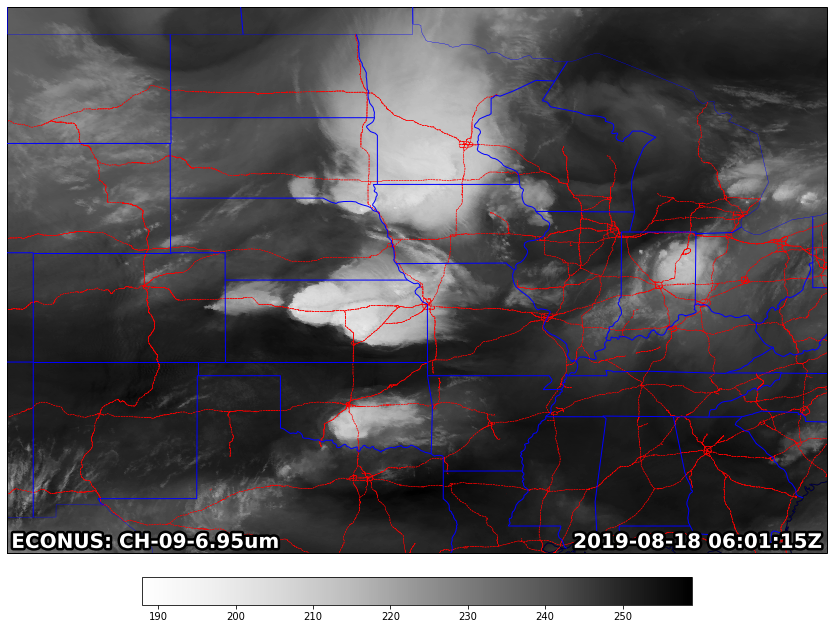

In [24]:
GOES(Sector,Channel,"Greys",times[-240],'/Users/chowdahead/Desktop/GOES/ECONUS/08_17/',
         roads="ahh",User_Extent=[-110.,-80,30,50],plt_show="y") #IR.IR_Colormap() vmin=162.,vmax=330.

In [ ]:
for i in range(100,250):
    GOES(Sector,Channel,IR.IR_Colormap(),times[-i],'/Users/chowdahead/Desktop/GOES/ECONUS/08_17/',
         vmin=162.,vmax=330.,roads="ahh",User_Extent=[-110.,-80,30,50])
    print("next.")

In [ ]:
for i in range(250,300):
    GOES(Sector,Channel,IR.IR_Colormap(),times[-i],'/Users/chowdahead/Desktop/GOES/ECONUS/08_17/',
         vmin=162.,vmax=330.,roads="ahh",User_Extent=[-110.,-80,30,50])
    print("next.")

In [ ]:
for i in range(1,61):
    GOES(Sector,Channel,IR.IR_Colormap(),times[-i],vmin=162.,vmax=330.,roads="ahh",User_Extent=[-108.,-92,35,45],
        dfLat=df["Lat"][22],dfLon=df["Lon"][22])


In [ ]:
%%time

if Sector =="ECONUS" or "WCONUS":
    extent = [-130,-65,10,55]
if Sector !="ECONUS" or "WCONUS":
    extent = None
#extent = [-110,-92,30,42]
GOES(Sector,Channel,IR.IR_Colormap(),times[-1],vmin=162.,vmax=330.,roads="",User_Extent=extent)


In [ ]:
%%time

# Create new figure
fig = plt.figure(figsize=(17., 11.))

# Add the map and set the extent
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax.add_feature(political_boundaries, linestyle='-', edgecolor='black')
ax.add_feature(states, linestyle='-', edgecolor='black',linewidth=2)

state_borders = cfeature.NaturalEarthFeature(
                category='cultural', name='admin_1_states_provinces_lines',
                scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='b', linewidth=1, zorder=3)
country_borders = cfeature.NaturalEarthFeature(category='cultural',
            name='admin_0_countries',scale='50m', facecolor='none')

# load the shapefile, use the name 'states'
reader = shpreader.Reader('/Users/chowdahead/Downloads/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties,ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none',edgecolor='r')

# Access server for Satellite Image
##################################################################################################### 
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("satellite")
availableSectors = DataAccessLayer.getAvailableLocationNames(request)
availableSectors.sort()
request.setLocationNames("EMESO-1")
availableProducts = DataAccessLayer.getAvailableParameters(request)
availableProducts.sort()
request.setParameters(availableProducts[15])
print(availableProducts[15])
times = DataAccessLayer.getAvailableTimes(request)
response = DataAccessLayer.getGridData(request, [times[-1]])
grid = response[0]
data = grid.getRawData()
#data = np.ma.masked_where(data<10,data)
lons,lats = grid.getLatLonCoords()
lats = np.nan_to_num(lats)
lons = np.nan_to_num(lons)
GOES_bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
#bbox = [-130.,-60,10.,60.]
#bbox = [-110.,-90,30.,45.]
print("grid size " + str(data.shape))
print("grid extent " + str(list(GOES_bbox)))


# Access server for County Warning Areas
#####################################################################################################    
# Server, Data Request Type, and Database Table
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest('maps')
request.addIdentifier('table', 'mapdata.county')

# Define a WFO ID for location
# tie this ID to the mapdata.county column "cwa" for filtering
cwa = 'ABR'
request.setLocationNames(cwa)
request.addIdentifier('cwa', cwa)

# enable location filtering (inLocation)
# locationField is tied to the above cwa definition (BOU)
request.addIdentifier('geomField', 'the_geom')
request.addIdentifier('inLocation', 'true')
request.addIdentifier('locationField', 'cwa')

# This is essentially the same as "'"select count(*) from mapdata.cwa where cwa='BOU';" (=1)

# Get response and create dict of county geometries
response = DataAccessLayer.getGeometryData(request, [])
counties = np.array([])
for ob in response:
    counties = np.append(counties,ob.getGeometry())
print("Using " + str(len(counties)) + " county MultiPolygons")

# All WFO counties merged to a single Polygon
merged_counties = cascaded_union(counties)
envelope = merged_counties.buffer(2)
boundaries=[merged_counties]

# Get bounds of this merged Polygon to use as buffered map extent
bounds = merged_counties.bounds
bbox=[bounds[0]-1,bounds[2]+1,bounds[1]-1.5,bounds[3]+1.5]


#fig, ax = make_map(bbox=bbox)

for i, geom in enumerate(boundaries):
    gbounds = Polygon(geom)
    intersection = gbounds.intersection
    geoms = (intersection(geom)
         for geom in boundaries
         if gbounds.intersects(geom))
    shape_feature = ShapelyFeature(geoms,ccrs.PlateCarree(), 
                        facecolor='none', linestyle="-",linewidth=3.,edgecolor='#cc5000')
    ax.add_feature(shape_feature)


# Get city info for plotting major cities in and around the CWA
#####################################################################################################
request = DataAccessLayer.newDataRequest('maps', envelope=envelope)
request.addIdentifier('table', 'mapdata.city')
request.addIdentifier('geomField', 'the_geom')
request.setParameters('name','population','prog_disc')
cities = DataAccessLayer.getGeometryData(request, [])
print("Found " + str(len(cities)) + " city Points")

citylist = []
cityname = []
# For BOU, progressive disclosure values above 50 and pop above 5000 looks good
for ob in cities:
    if ((ob.getNumber("prog_disc")>50) and ob.getString("population") !="None"):
        if int(ob.getString("population")) > 5000:
    #if ((ob.getNumber("prog_disc")>7000)):
            #print(ob.getNumber("prog_disc"))
            citylist.append(ob.getGeometry())
            cityname.append(ob.getString("name"))
            #print("city pops: ",ob.getString("population"))
citylist.append(ob.getGeometry())
cityname.append(ob.getString("name"))
print("Using " + str(len(cityname)) + " city Points")
#print(list(cityname))

geolocator = Nominatim()
for city in cityname:
    #print(city)
    loc = geolocator.geocode(city)
    try:
        #bounds[0],bounds[2],bounds[1],bounds[3]
        if bounds[0] < loc.longitude < bounds[2] and bounds[1] < loc.latitude < bounds[3]:
            print(city,loc.longitude,loc.latitude)
            ax.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10,zorder=15)
            ax.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k',zorder=15)#linewidth=4,
    except:
        "nothing?"
"""
# Topo map
#####################################################################################################       
import numpy.ma as ma
request = DataAccessLayer.newDataRequest()
request.setDatatype("topo")
request.addIdentifier("group", "/")
request.addIdentifier("dataset", "full")
request.setEnvelope(envelope)
gridData = DataAccessLayer.getGridData(request)
print(gridData)
print("Number of grid records: " + str(len(gridData)))
print("Sample grid data shape:\n" + str(gridData[0].getRawData().shape) + "\n")
print("Sample grid data:\n" + str(gridData[0].getRawData()) + "\n")


#fig, ax = make_map(bbox=bbox)
grid=gridData[0]
topo=ma.masked_invalid(grid.getRawData()) 
lon, lat = grid.getLatLonCoords()
print(topo.min())
print(topo.max())

# Plot topography
cs = ax.contourf(lon, lat, topo, 80, cmap=plt.get_cmap('terrain'),alpha=0.1)
#cbar = fig.colorbar(cs, extend='both', shrink=0.5, orientation='horizontal')
#cbar.set_label("topography height in meters")
"""
        
# Plotting the GOES data
#####################################################################################################
cs = ax.pcolormesh(lons, lats, data, cmap=IR.IR_Colormap(),vmin=162.,vmax=330.) #cmap=IR.IR_Colormap(),vmin=162.,vmax=330.
cbar = fig.colorbar(cs, fraction=0.031, orientation='horizontal',pad=0.005,aspect=30)


# Plot CWA counties
#####################################################################################################
for i, geom in enumerate(counties):
    cbounds = Polygon(geom)
    intersection = cbounds.intersection
    geoms = (intersection(geom)
         for geom in counties
         if cbounds.intersects(geom))
    shape_feature = ShapelyFeature(geoms,ccrs.PlateCarree(), 
                        facecolor='none', linestyle=":",edgecolor='#cc5300')#'#86989B'
    ax.add_feature(shape_feature)
        
# For GOES lats/lons
#ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()],ccrs.PlateCarree())

# For CWA lats/lons
ax.set_extent([bounds[0]-4,bounds[2]+4,bounds[1]-6,bounds[3]+6],ccrs.PlateCarree())

# Label the plot
text_time = ax.text(.995, 0.01, 
        str(grid.getDataTime())+"Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold',zorder=15)

text_time2 = ax.text(0.005, 0.01, 
        "GOES \n CWA: "+cwa,
        horizontalalignment='left', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold',zorder=15)
#Sector+": "+Channel+" - CWA: "+cwa


outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)
text_time2.set_path_effects(outline_effect)
title = str(grid.getDataTime())[:-2].replace(":","").replace(" ","_")
#plt.show()
plt.savefig("/Users/chowdahead/Desktop/GOES_cwa_"+cwa+"_"+
    title+"Z"+".png",bbox_inches="tight",dpi=200)

In [ ]:
from netCDF4 import Dataset
import numpy as np
import os

# navigate to directory with .nc data files (raw radiance files in my case)
os.chdir('/Users/chowdahead/Downloads/')
full_direc = os.listdir()
nc_files = [ii for ii in full_direc if ii.endswith('.nc')]
nc_indx = 0
g16_data_file = nc_files[nc_indx] # select .nc file
print(nc_files[nc_indx]) # print file name

# designate dataset
g16nc = Dataset(g16_data_file, 'r')

# GOES-R projection info and retrieving relevant constants
proj_info = g16nc.variables['goes_imager_projection']
lon_origin = proj_info.longitude_of_projection_origin
H = proj_info.perspective_point_height+proj_info.semi_major_axis
r_eq = proj_info.semi_major_axis
r_pol = proj_info.semi_minor_axis

# Data info
lat_rad_1d = g16nc.variables['x'][:]
lon_rad_1d = g16nc.variables['y'][:]

# close file when finished
g16nc.close()
g16nc = None

# create meshgrid filled with radian angles
lat_rad,lon_rad = np.meshgrid(lat_rad_1d,lon_rad_1d)

# lat/lon calc routine from satellite radian angle vectors

lambda_0 = (lon_origin*np.pi)/180.0

a_var = np.power(np.sin(lat_rad),2.0) + (np.power(np.cos(lat_rad),2.0)*(np.power(np.cos(lon_rad),2.0)+(((r_eq*r_eq)/(r_pol*r_pol))*np.power(np.sin(lon_rad),2.0))))
b_var = -2.0*H*np.cos(lat_rad)*np.cos(lon_rad)
c_var = (H**2.0)-(r_eq**2.0)

r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)

s_x = r_s*np.cos(lat_rad)*np.cos(lon_rad)
s_y = - r_s*np.sin(lat_rad)
s_z = r_s*np.cos(lat_rad)*np.sin(lon_rad)

lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
lon = (lambda_0 - np.arctan(s_y/(H-s_x)))*(180.0/np.pi)


# print test coordinates
print('{} N, {} W'.format(lat[318,1849],abs(lon[318,1849])))

In [ ]:
cd ~/Desktop/

# Animation